먼저 112신고건수에 영향을 미치는 요인에 대하여 분석한 연구에 따르면, 경찰서 급지 별로 나누어 분석한 결과 중소도시 지역과 농어촌 지역에서는 관할인구와 외국인 수, 공원 수가 112신고건수에 영향을 미치는 반면 대도시 지역에서는 이외에도 유흥업소와 숙박업소 수, 학교, 금융기관 등 현금다액 취급업소 등이 추가적으로 영향을 미치는 것으로 나타나 지역별로 이러한 장소적 여건을 고려한 치안활동이 필요한 것으로 나타났다(강욱․최천근, 2015: 21).

--> 이런 것도 고려하면 좋지 않을까?

# **데이터 병합 및 열 분석**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/KP

/content/drive/.shortcut-targets-by-id/1MOwXhCpxS1xE05hFy25XhM9ZMh3UQVQk/KP


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def cut(string, start, end):
    return string[start : end + 1]

def len6(s):
  return '0' * (6 - len(s)) + s

In [ ]:
KP2021 = pd.DataFrame()
KP2021 = pd.read_csv('KP2021.csv', encoding='cp949')
KP2020 = pd.DataFrame()
KP2020 = pd.read_csv('KP2020.csv', encoding='cp949')
NPA2020 = pd.DataFrame()
NPA2020 = pd.read_csv('NPA2020.csv', encoding='cp949')

In [ ]:
print(len(KP2021))
len(KP2020)

2594060


77077

In [ ]:
KP2021.shape
KP2020.shape
KP2021.info()
KP2020.info()
print(KP2021)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2594060 entries, 0 to 2594059
Data columns (total 10 columns):
 #   Column         Dtype  
---  ------         -----  
 0   RECV_DEPT_NM   object 
 1   RECV_CPLT_DM   object 
 2   NPA_CL         int64  
 3   EVT_STAT_CD    int64  
 4   EVT_CL_CD      int64  
 5   RPTER_SEX      float64
 6   HPPN_PNU_ADDR  object 
 7   HPPN_X         float64
 8   HPPN_Y         float64
 9   SME_EVT_YN     object 
dtypes: float64(3), int64(3), object(4)
memory usage: 197.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77077 entries, 0 to 77076
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RECV_DEPT_NM   77077 non-null  object 
 1   RECV_CPLT_DM   77077 non-null  object 
 2   NPA_CL         77077 non-null  int64  
 3   EVT_STAT_CD    77077 non-null  int64  
 4   EVT_CL_CD      77077 non-null  int64  
 5   RPTER_SEX      74658 non-null  float64
 6   HPPN_PNU_ADDR  47805 

In [ ]:
NPA2020['RECV_CPLT_TM'] = NPA2020['RECV_CPLT_TM'].apply(str)
NPA2020['RECV_CPLT_DT'] = NPA2020['RECV_CPLT_DT'].apply(str)

In [ ]:
NPA2020['RECV_CPLT_TM'] = NPA2020['RECV_CPLT_TM'].apply(len6)

In [ ]:
NPA2020['YEAR'] = NPA2020['RECV_CPLT_DT'].apply(cut, args=(2, 3))
NPA2020['MONTH'] = NPA2020['RECV_CPLT_DT'].apply(cut, args=(4, 5))
NPA2020['DAY'] = NPA2020['RECV_CPLT_DT'].apply(cut, args=(6, 7))
NPA2020['HOUR'] = NPA2020['RECV_CPLT_TM'].apply(cut, args=(0, 1))

In [ ]:
NPA2020 = NPA2020.drop(['RECV_CPLT_DT', 'RECV_CPLT_TM', 'SME_EVT_YN', 'HPPN_OLD_ADDR'], axis=1)

In [ ]:
idx = NPA2020[NPA2020['RPTER_SEX'].str.contains('{')].index
NPA2020 = NPA2020.drop(list(idx), axis=0)

In [ ]:
idx = NPA2020[NPA2020['RPTER_SEX'].str.contains(' ')].index
NPA2020 = NPA2020.drop(list(idx), axis=0)

In [ ]:
NPA2020 = NPA2020.replace({'HPPN_X':0}, np.nan)
NPA2020 = NPA2020.replace({'HPPN_Y':0}, np.nan)

In [ ]:
NPA2020 = NPA2020.astype({'RPTER_SEX':int})
NPA2020 = NPA2020.astype({'YEAR':int})
NPA2020 = NPA2020.astype({'MONTH':int})
NPA2020 = NPA2020.astype({'DAY':int})
NPA2020 = NPA2020.astype({'HOUR':int})

In [ ]:
NPA2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1134135 entries, 0 to 1178242
Data columns (total 10 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   NPA_CL       1134135 non-null  int64  
 1   EVT_STAT_CD  1134135 non-null  int64  
 2   EVT_CL_CD    1134135 non-null  int64  
 3   RPTER_SEX    1134135 non-null  int64  
 4   HPPN_X       890772 non-null   float64
 5   HPPN_Y       890772 non-null   float64
 6   YEAR         1134135 non-null  int64  
 7   MONTH        1134135 non-null  int64  
 8   DAY          1134135 non-null  int64  
 9   HOUR         1134135 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 95.2 MB


In [ ]:
KP_concat = pd.concat([KP2021, KP2020], ignore_index=True)

In [ ]:
KP_concat.info()
print(KP_concat)
KP_concat.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671137 entries, 0 to 2671136
Data columns (total 10 columns):
 #   Column         Dtype  
---  ------         -----  
 0   RECV_DEPT_NM   object 
 1   RECV_CPLT_DM   object 
 2   NPA_CL         int64  
 3   EVT_STAT_CD    int64  
 4   EVT_CL_CD      int64  
 5   RPTER_SEX      float64
 6   HPPN_PNU_ADDR  object 
 7   HPPN_X         float64
 8   HPPN_Y         float64
 9   SME_EVT_YN     object 
dtypes: float64(3), int64(3), object(4)
memory usage: 203.8+ MB
        RECV_DEPT_NM                 RECV_CPLT_DM  NPA_CL  EVT_STAT_CD  \
0                대전청  21/03/07 00:00:01.000000000      13           10   
1                대전청  21/03/07 00:02:13.000000000      13           10   
2                대전청  21/03/07 00:00:33.000000000      13           10   
3                대전청  21/03/07 00:01:18.000000000      13           10   
4                대전청  21/03/07 00:01:43.000000000      13           10   
...              ...                       

,RECV_DEPT_NM,RECV_CPLT_DM,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_PNU_ADDR,HPPN_X,HPPN_Y,SME_EVT_YN
0,대전청,21/03/07 00:00:01.000000000,13,10,604,3.0,대전광역시 서구 둔산동 1122,127.373676,36.350975,Y
1,대전청,21/03/07 00:02:13.000000000,13,10,201,1.0,대전광역시 유성구 상대동(원신흥동) 469-9,127.339018,36.347420,NaN
2,대전청,21/03/07 00:00:33.000000000,13,10,601,3.0,NaN,127.404663,36.341685,NaN
3,대전청,21/03/07 00:01:18.000000000,13,10,601,3.0,NaN,127.404663,36.341685,NaN
4,대전청,21/03/07 00:01:43.000000000,13,10,308,1.0,대전광역시 중구 선화동 141-16,127.420455,36.330413,NaN


In [ ]:
KP_concat = KP_concat.drop(['RECV_DEPT_NM', 'HPPN_PNU_ADDR'], axis=1)

In [ ]:
KP_concat.head()

,RECV_CPLT_DM,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_X,HPPN_Y,SME_EVT_YN
0,21/03/07 00:00:01.000000000,13,10,604,3.0,127.373676,36.350975,Y
1,21/03/07 00:02:13.000000000,13,10,201,1.0,127.339018,36.347420,NaN
2,21/03/07 00:00:33.000000000,13,10,601,3.0,127.404663,36.341685,NaN
3,21/03/07 00:01:18.000000000,13,10,601,3.0,127.404663,36.341685,NaN
4,21/03/07 00:01:43.000000000,13,10,308,1.0,127.420455,36.330413,NaN


In [ ]:
KP_concat['YEAR'] = KP_concat['RECV_CPLT_DM'] #날짜 col 만들기
KP_concat['MONTH'] = KP_concat['RECV_CPLT_DM'] #시간 col 만들기
KP_concat['DAY'] = KP_concat['RECV_CPLT_DM'] #날짜 col 만들기
KP_concat['HOUR'] = KP_concat['RECV_CPLT_DM'] #시간 col 만들기

In [ ]:
KP_concat['YEAR'] = KP_concat['RECV_CPLT_DM'].apply(cut, args=(0, 1))
KP_concat['MONTH'] = KP_concat['RECV_CPLT_DM'].apply(cut, args=(3, 4))
KP_concat['DAY'] = KP_concat['RECV_CPLT_DM'].apply(cut, args=(6, 7))
KP_concat['HOUR'] = KP_concat['RECV_CPLT_DM'].apply(cut, args=(9, 10))

In [ ]:
KP_concat = KP_concat.astype({'YEAR':int, 'MONTH':int, 'DAY':int, 'HOUR':int})

In [ ]:
KP_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671137 entries, 0 to 2671136
Data columns (total 12 columns):
 #   Column        Dtype  
---  ------        -----  
 0   RECV_CPLT_DM  object 
 1   NPA_CL        int64  
 2   EVT_STAT_CD   int64  
 3   EVT_CL_CD     int64  
 4   RPTER_SEX     float64
 5   HPPN_X        float64
 6   HPPN_Y        float64
 7   SME_EVT_YN    object 
 8   YEAR          int64  
 9   MONTH         int64  
 10  DAY           int64  
 11  HOUR          int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 244.6+ MB


In [ ]:
KP_concat = KP_concat.drop(['RECV_CPLT_DM'], axis=1)

In [ ]:
KP_concat.head()

,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_X,HPPN_Y,SME_EVT_YN,YEAR,MONTH,DAY,HOUR
0,13,10,604,3.0,127.373676,36.350975,Y,21,3,7,0
1,13,10,201,1.0,127.339018,36.347420,NaN,21,3,7,0
2,13,10,601,3.0,127.404663,36.341685,NaN,21,3,7,0
3,13,10,601,3.0,127.404663,36.341685,NaN,21,3,7,0
4,13,10,308,1.0,127.420455,36.330413,NaN,21,3,7,0


In [ ]:
KP_concat = KP_concat.drop(['SME_EVT_YN'], axis=1)
KP_concat

,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_X,HPPN_Y,YEAR,MONTH,DAY,HOUR
0,13,10,604,3.0,127.373676,36.350975,21,3,7,0
1,13,10,201,1.0,127.339018,36.347420,21,3,7,0
2,13,10,601,3.0,127.404663,36.341685,21,3,7,0
3,13,10,601,3.0,127.404663,36.341685,21,3,7,0
4,13,10,308,1.0,127.420455,36.330413,21,3,7,0
...,...,...,...,...,...,...,...,...,...,...
2671132,19,10,302,2.0,126.571002,36.387791,20,12,31,1
2671133,19,10,501,3.0,NaN,NaN,20,12,31,1
2671134,19,10,604,3.0,127.000391,36.788411,20,12,31,0
2671135,13,10,302,2.0,127.373351,36.348051,20,12,31,0


In [ ]:
KP_concat = KP_concat.dropna(subset=['RPTER_SEX'], how = 'any', axis = 0).copy()
KP_concat = KP_concat.astype({'RPTER_SEX':int})
KP_concat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2644824 entries, 0 to 2671136
Data columns (total 10 columns):
 #   Column       Dtype  
---  ------       -----  
 0   NPA_CL       int64  
 1   EVT_STAT_CD  int64  
 2   EVT_CL_CD    int64  
 3   RPTER_SEX    int64  
 4   HPPN_X       float64
 5   HPPN_Y       float64
 6   YEAR         int64  
 7   MONTH        int64  
 8   DAY          int64  
 9   HOUR         int64  
dtypes: float64(2), int64(8)
memory usage: 222.0 MB


In [ ]:
train = pd.concat([KP_concat, NPA2020], ignore_index=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3778959 entries, 0 to 3778958
Data columns (total 10 columns):
 #   Column       Dtype  
---  ------       -----  
 0   NPA_CL       int64  
 1   EVT_STAT_CD  int64  
 2   EVT_CL_CD    int64  
 3   RPTER_SEX    int64  
 4   HPPN_X       float64
 5   HPPN_Y       float64
 6   YEAR         int64  
 7   MONTH        int64  
 8   DAY          int64  
 9   HOUR         int64  
dtypes: float64(2), int64(8)
memory usage: 288.3 MB


필요한 열 값 분석

# **데이터 전처리 - 결측치 제거**

1-1. NPA_CL 전처리

In [ ]:
train['NPA_CL'].value_counts() #13 19 31 대전, 충남, 세종을 제외한 좌표 제거

19    2158584
13    1494639
31      95750
15       7811
18       6395
8        5348
20       3039
11       1215
21        998
16        908
22        865
9         685
23        652
17        612
10        543
12        458
24        259
14        198
Name: NPA_CL, dtype: int64

In [ ]:
train['NPA_CL'].isnull().sum() #결격치 확인

0

In [ ]:
train_region1 = train[train['NPA_CL'] == 13]
train_region2 = train[train['NPA_CL'] == 19]
train_region3 = train[train['NPA_CL'] == 31]

In [ ]:
train_region = pd.concat([train_region1,train_region2])

In [ ]:
train_region = pd.concat([train_region,train_region3])

In [ ]:
train = train_region.copy()

In [ ]:
train['NPA_CL'].value_counts()

19    2158584
13    1494639
31      95750
Name: NPA_CL, dtype: int64

1-2. EVT_STAT_CD 전처리

In [ ]:
train['EVT_STAT_CD'].value_counts()

10    3736708
5        8426
7        3235
9         323
3         228
6          31
2          16
8           3
1           3
Name: EVT_STAT_CD, dtype: int64

In [ ]:
train['EVT_STAT_CD'].isnull().sum() #결격치 확인

0

1-3. EVT_CL_CD 전처리

In [ ]:
train['EVT_CL_CD'].value_counts()

601    1155327
501     756198
307     264487
401     262657
301     118798
201      92612
210      91852
302      91181
604      75689
406      67660
305      66787
402      59792
306      59318
606      59043
104      54531
506      47789
215      45707
107      45123
403      34888
503      31843
509      29154
508      21546
303      19958
206      18088
308      16779
304      16725
208      14999
211      14643
205      13219
202      12817
505      11433
609      10250
602       9076
502       7257
607       6809
209       6414
603       5909
108       5687
106       4581
207       3868
507       3844
212       3263
610       2465
213       2323
204       2217
109        991
216        863
214        802
504        667
105        543
101        118
203        102
102         94
605         91
405         52
404         22
103         21
608          1
Name: EVT_CL_CD, dtype: int64

In [ ]:
train['EVT_CL_CD'].isnull().sum() #결격치 확인

0

1-4. RPTER_SEX 전처리


In [ ]:
train['RPTER_SEX'].value_counts()

1    1688398
3    1176860
2     883715
Name: RPTER_SEX, dtype: int64

In [ ]:
train['RPTER_SEX'].isnull().sum() #결격치 확인

0

1-5. HPPN_X 전처리 & 1-6. HPPN_Y 전처리


In [ ]:
train['HPPN_X'].value_counts()

127.404663    502169
126.191890     23200
126.923007     12910
127.126514      6024
127.454167      5437
               ...  
126.647530         1
126.423066         1
126.861335         1
126.950762         1
127.295695         1
Name: HPPN_X, Length: 742118, dtype: int64

In [ ]:
train['HPPN_X'].isnull().sum()

928814

In [ ]:
train['HPPN_Y'].value_counts

<bound method IndexOpsMixin.value_counts of 0          36.350975
1          36.347420
2          36.341685
3          36.341685
4          36.330413
             ...    
2644628    36.466238
2644643    36.502858
2644665    36.678505
2644770    36.511364
2644785    36.481174
Name: HPPN_Y, Length: 3748973, dtype: float64>

In [ ]:
train['HPPN_Y'].isnull().sum()

928814

In [ ]:
train_wmi = train.dropna().copy()
train_215_wmi = train_wmi[train_wmi['EVT_CL_CD'] == 215]
train_215_wmi = train_215_wmi.drop(['EVT_CL_CD'], axis=1)
train_215_wmi.head()

,NPA_CL,EVT_STAT_CD,RPTER_SEX,HPPN_X,HPPN_Y,YEAR,MONTH,DAY,HOUR
875,13,10,2,127.385139,36.321829,21,1,1,13
4685,13,10,2,127.404663,36.341685,21,1,3,18
5691,13,10,2,127.404663,36.341685,21,1,7,7
6046,13,10,3,127.394722,36.438611,21,1,4,11
6119,13,10,3,127.356967,36.332099,21,1,7,8


In [ ]:
train = train.fillna(train.mean()['HPPN_X':'HPPN_Y']).copy()

In [ ]:
train['HPPN_X'].isnull().sum()

0

In [ ]:
train['HPPN_Y'].isnull().sum()

0

1-7. YEAR 전처리

In [ ]:
train['YEAR'].value_counts()

22    1254792
21    1227814
20    1208042
23      58325
Name: YEAR, dtype: int64

In [ ]:
train['YEAR'].isnull().sum()

0

1-8. MONTH 전처리

In [ ]:
train['MONTH'].value_counts()

7     353427
9     353350
8     352950
6     346472
10    343517
5     334454
1     313920
4     290736
11    280370
3     279531
12    265360
2     234886
Name: MONTH, dtype: int64

In [ ]:
train['MONTH'].isnull().sum()

0

1-9. DAY 전처리

In [ ]:
train['DAY'].value_counts()

15    128176
11    127405
14    125669
18    125614
12    125469
3     125163
7     125109
20    125093
13    124841
17    124637
16    124604
9     124470
2     124392
4     123730
21    123644
10    123547
1     122864
8     122739
5     122410
19    122051
6     121902
26    119983
27    119970
25    119908
28    119884
24    119839
23    119447
22    118620
29    114578
30    110870
31     72345
Name: DAY, dtype: int64

In [ ]:
train['MONTH'].isnull().sum()

0

1-10. HOUR 전처리


In [ ]:
train['DAY'].value_counts()

15    128176
11    127405
14    125669
18    125614
12    125469
3     125163
7     125109
20    125093
13    124841
17    124637
16    124604
9     124470
2     124392
4     123730
21    123644
10    123547
1     122864
8     122739
5     122410
19    122051
6     121902
26    119983
27    119970
25    119908
28    119884
24    119839
23    119447
22    118620
29    114578
30    110870
31     72345
Name: DAY, dtype: int64

In [ ]:
train['DAY'].isnull().sum()

0

# **전체 자료 분석**

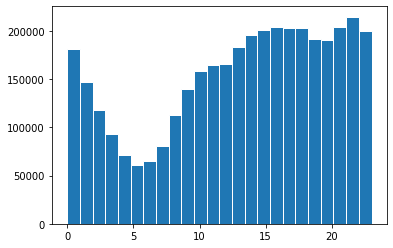

In [ ]:
plt.hist(x='HOUR', data=train.sort_values(by='HOUR'), bins=24, edgecolor='#FFFFFF');

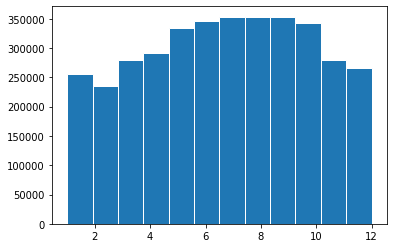

In [ ]:
plt.hist(x='MONTH', data=train[train['YEAR'] != 23].sort_values(by='MONTH'), bins=12, edgecolor='#FFFFFF'); #23년을 제외한 월별 조사

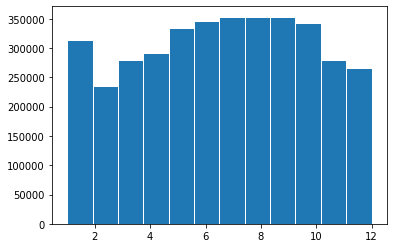

In [ ]:
plt.hist(x='MONTH', data=train.sort_values(by='MONTH'), bins=12, edgecolor='#FFFFFF'); #월별 조사


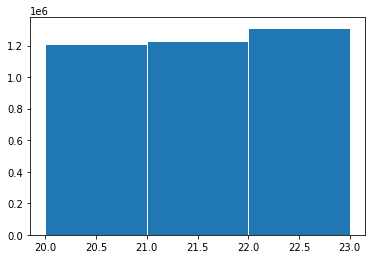

In [ ]:
plt.hist(x='YEAR', data=train, bins=3, edgecolor='#FFFFFF'); #연도별 조사


1688398 883715 1176860


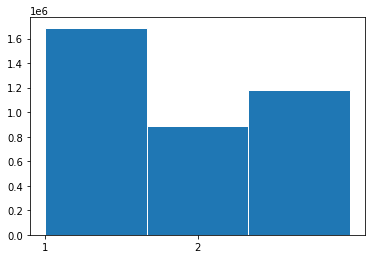

In [ ]:
#성별별 조사
plt.hist(x='RPTER_SEX', data=train, bins=3, edgecolor='#FFFFFF')
plt.xticks([1, 2]);
print(len(train[train['RPTER_SEX'] == 1]), len(train[train['RPTER_SEX'] == 2]), len(train[train['RPTER_SEX'] == 3]))

([<matplotlib.axis.XTick at 0x7f88e08d53a0>,
 <a list of 3 Text major ticklabel objects>)

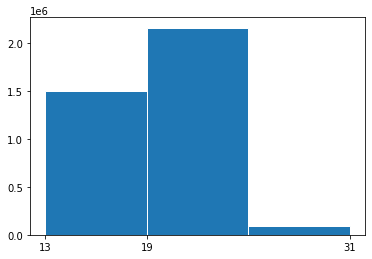

In [ ]:
#경찰청별 조사 (대전 13, 충남 19, 세종 31)
plt.hist(x='NPA_CL', data=train, bins=3, edgecolor = '#FFFFFF')
plt.xticks([13, 19, 31])

# 전체 자료 분석에서 하지 못한 요일별 분석

In [ ]:
train.head()

,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_X,HPPN_Y,YEAR,MONTH,DAY,HOUR
0,13,10,604,3,127.373676,36.350975,21,3,7,0
1,13,10,201,1,127.339018,36.347420,21,3,7,0
2,13,10,601,3,127.404663,36.341685,21,3,7,0
3,13,10,601,3,127.404663,36.341685,21,3,7,0
4,13,10,308,1,127.420455,36.330413,21,3,7,0


In [ ]:
train['YEAR'] += 2000
train['WEEKDAY'] = pd.to_datetime(train[['YEAR', 'MONTH', 'DAY']]).dt.dayofweek
train.head()

,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_X,HPPN_Y,YEAR,MONTH,DAY,HOUR,WEEKDAY
0,13,10,604,3,127.373676,36.350975,2021,3,7,0,6
1,13,10,201,1,127.339018,36.347420,2021,3,7,0,6
2,13,10,601,3,127.404663,36.341685,2021,3,7,0,6
3,13,10,601,3,127.404663,36.341685,2021,3,7,0,6
4,13,10,308,1,127.420455,36.330413,2021,3,7,0,6


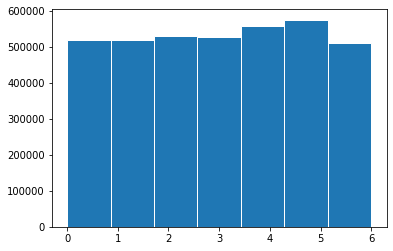

In [ ]:
plt.hist(x='WEEKDAY', data=train, bins=7, edgecolor='#FFFFFF');

In [ ]:
train_215.head()

,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_X,HPPN_Y,YEAR,MONTH,DAY,HOUR
875,13,10,215,2,127.385139,36.321829,21,1,1,13
4685,13,10,215,2,127.404663,36.341685,21,1,3,18
5691,13,10,215,2,127.404663,36.341685,21,1,7,7
6046,13,10,215,3,127.394722,36.438611,21,1,4,11
6119,13,10,215,3,127.356967,36.332099,21,1,7,8


In [ ]:
train_215['YEAR'] += 2000
train_215['WEEKDAY'] = pd.to_datetime(train_215[['YEAR', 'MONTH', 'DAY']]).dt.dayofweek
train_215.head()

<ipython-input-46-9cfd2f5d69a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_215['YEAR'] += 2000
<ipython-input-46-9cfd2f5d69a6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_215['WEEKDAY'] = pd.to_datetime(train_215[['YEAR', 'MONTH', 'DAY']]).dt.dayofweek


,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_X,HPPN_Y,YEAR,MONTH,DAY,HOUR,WEEKDAY
875,13,10,215,2,127.385139,36.321829,2021,1,1,13,4
4685,13,10,215,2,127.404663,36.341685,2021,1,3,18,6
5691,13,10,215,2,127.404663,36.341685,2021,1,7,7,3
6046,13,10,215,3,127.394722,36.438611,2021,1,4,11,0
6119,13,10,215,3,127.356967,36.332099,2021,1,7,8,3


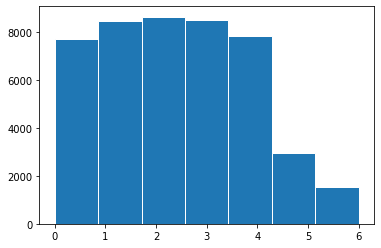

In [ ]:
plt.hist(x='WEEKDAY', data=train_215, bins=7, edgecolor='#FFFFFF');

# **보이스피싱 자료 분석**

In [ ]:
train_215 = train[train['EVT_CL_CD'] == 215]

In [ ]:
train_215.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45707 entries, 875 to 2643949
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   NPA_CL       45707 non-null  int64  
 1   EVT_STAT_CD  45707 non-null  int64  
 2   EVT_CL_CD    45707 non-null  int64  
 3   RPTER_SEX    45707 non-null  int64  
 4   HPPN_X       45707 non-null  float64
 5   HPPN_Y       45707 non-null  float64
 6   YEAR         45707 non-null  int64  
 7   MONTH        45707 non-null  int64  
 8   DAY          45707 non-null  int64  
 9   HOUR         45707 non-null  int64  
 10  WEEKDAY      45707 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 4.2 MB


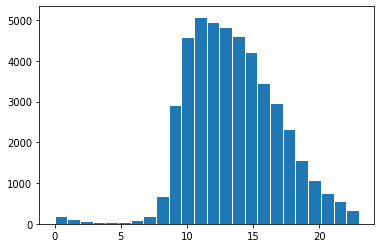

In [ ]:
plt.hist(x='HOUR', data=train_215.sort_values(by='HOUR'), bins=24, edgecolor='#FFFFFF');

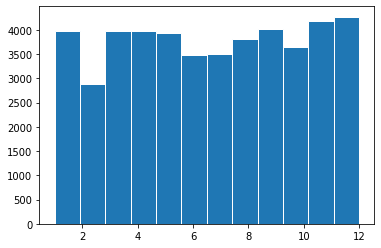

In [ ]:
plt.hist(x='MONTH', data=train_215[train_215['YEAR'] != 23].sort_values(by='MONTH'), bins=12, edgecolor='#FFFFFF'); #23년을 제외한 월별 조사

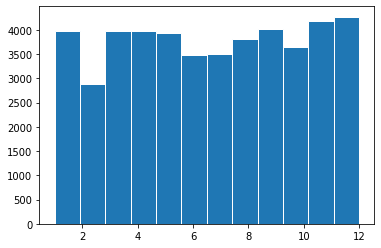

In [ ]:
plt.hist(x='MONTH', data=train_215.sort_values(by='MONTH'), bins=12, edgecolor='#FFFFFF'); #월별 조사


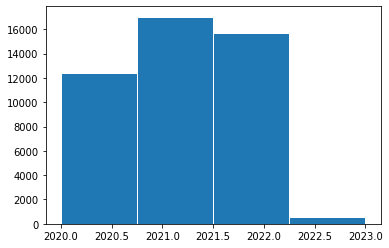

In [ ]:
plt.hist(x='YEAR', data=train_215, bins=4, edgecolor='#FFFFFF'); #연도별 조사


21675 19067 4965


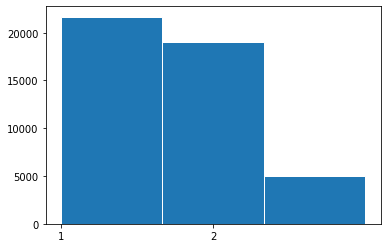

In [ ]:
#성별별 조사
plt.hist(x='RPTER_SEX', data=train_215, bins=3, edgecolor='#FFFFFF')
plt.xticks([1, 2]);
print(len(train_215[train_215['RPTER_SEX'] == 1]), len(train_215[train_215['RPTER_SEX'] == 2]), len(train_215[train_215['RPTER_SEX'] == 3]))

In [ ]:
dummy = train_215['NPA_CL']
print(len(dummy.loc[dummy == 13]))
print(len(dummy.loc[dummy == 19]))
print(len(dummy.loc[dummy == 31]))


11176
31595
2936


([<matplotlib.axis.XTick at 0x7f3ee3f66a90>,
 <a list of 3 Text major ticklabel objects>)

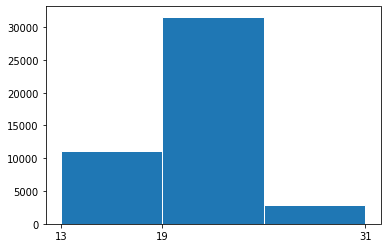

In [ ]:
#경찰청별 조사 (대전 13, 충남 19, 세종 31)
plt.hist(x='NPA_CL', data=train_215, bins=3, edgecolor = '#FFFFFF')
plt.xticks([13, 19, 31])

# **데이터 이상치 분석 및 상관관계 분석**

In [ ]:
train.corr()


,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_X,HPPN_Y,YEAR,MONTH,DAY,HOUR,WEEKDAY
NPA_CL,1.000000,0.002267,-0.032993,0.008867,-0.423631,0.402017,0.037659,0.002527,0.001411,0.013604,0.005395
EVT_STAT_CD,0.002267,1.000000,0.023481,0.015572,0.003339,-0.013132,0.035692,-0.024754,-0.000157,-0.039181,0.001248
EVT_CL_CD,-0.032993,0.023481,1.000000,0.413038,0.087487,-0.122773,0.022170,0.002835,-0.001169,-0.015496,-0.009341
RPTER_SEX,0.008867,0.015572,0.413038,1.000000,0.034479,-0.057674,0.097421,0.019606,0.000548,-0.007048,-0.006751
HPPN_X,-0.423631,0.003339,0.087487,0.034479,1.000000,-0.591493,0.031297,-0.005626,0.000043,-0.011845,-0.015741
HPPN_Y,0.402017,-0.013132,-0.122773,-0.057674,-0.591493,1.000000,-0.013919,-0.000705,-0.001865,-0.006272,0.008223
YEAR,0.037659,0.035692,0.022170,0.097421,0.031297,-0.013919,1.000000,-0.020579,-0.020452,0.006947,0.001944
MONTH,0.002527,-0.024754,0.002835,0.019606,-0.005626,-0.000705,-0.020579,1.000000,0.002906,-0.010423,0.004480
DAY,0.001411,-0.000157,-0.001169,0.000548,0.000043,-0.001865,-0.020452,0.002906,1.000000,0.004490,-0.002008
HOUR,0.013604,-0.039181,-0.015496,-0.007048,-0.011845,-0.006272,0.006947,-0.010423,0.004490,1.000000,-0.046654


In [ ]:
train_215.corr()

,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_X,HPPN_Y,YEAR,MONTH,DAY,HOUR,WEEKDAY
NPA_CL,1.000000,0.002999,NaN,0.021679,-0.232929,0.274242,0.097440,0.010808,0.006118,0.007636,0.008232
EVT_STAT_CD,0.002999,1.000000,NaN,0.012548,-0.001650,-0.006882,0.030912,-0.021916,0.001146,-0.036436,-0.012337
EVT_CL_CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RPTER_SEX,0.021679,0.012548,NaN,1.000000,0.005964,0.012132,0.039446,-0.014013,0.005627,0.001746,0.011987
HPPN_X,-0.232929,-0.001650,NaN,0.005964,1.000000,-0.454656,0.012878,-0.011413,0.001923,0.005759,-0.003018
HPPN_Y,0.274242,-0.006882,NaN,0.012132,-0.454656,1.000000,-0.022692,0.004639,-0.005846,-0.006037,-0.013285
YEAR,0.097440,0.030912,NaN,0.039446,0.012878,-0.022692,1.000000,-0.129577,0.002637,0.045276,0.035245
MONTH,0.010808,-0.021916,NaN,-0.014013,-0.011413,0.004639,-0.129577,1.000000,-0.010067,0.002238,-0.000229
DAY,0.006118,0.001146,NaN,0.005627,0.001923,-0.005846,0.002637,-0.010067,1.000000,-0.012132,0.014822
HOUR,0.007636,-0.036436,NaN,0.001746,0.005759,-0.006037,0.045276,0.002238,-0.012132,1.000000,0.034233


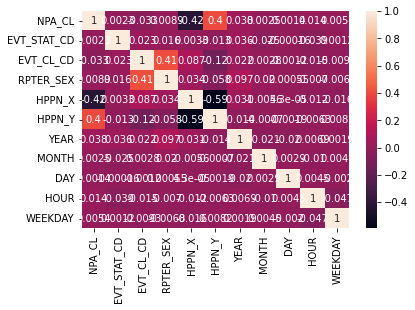

In [ ]:
sns.heatmap(train.corr(), annot = True)

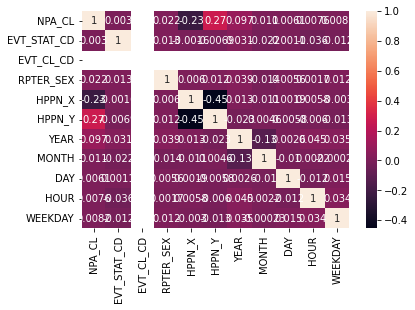

In [ ]:
sns.heatmap(train_215.corr(), annot = True)

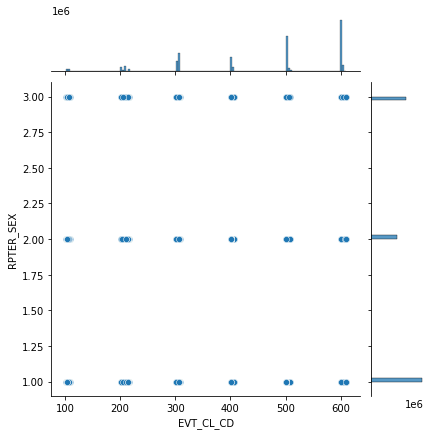

In [ ]:
sns.jointplot(data = train, x = 'EVT_CL_CD', y = 'RPTER_SEX')

In [ ]:
def outlier(df, col, z):
    return df[abs(df[col] - np.mean(df[col]))/np.std(df[col])>z].index

In [ ]:
train.loc[outlier(train, 'HPPN_X', 2)]

,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_X,HPPN_Y,YEAR,MONTH,DAY,HOUR,WEEKDAY
1742,13,10,501,1,129.043119,37.234727,2021,1,2,14,5
1745,13,10,601,1,129.043119,37.234727,2021,1,2,14,5
1746,13,10,601,1,129.043119,37.234727,2021,1,2,14,5
2032,13,10,508,2,126.447225,36.777309,2021,1,2,15,5
6698,13,10,601,3,128.622295,35.908127,2021,1,3,15,6
...,...,...,...,...,...,...,...,...,...,...,...
2049564,31,10,307,2,128.627604,35.879393,2022,8,28,4,6
2065550,31,10,210,2,126.303875,36.747601,2022,9,2,0,4
2065673,31,10,210,2,126.303875,36.747601,2022,9,2,0,4
2304403,31,10,406,1,128.672095,35.897456,2022,10,30,23,6


본 데이터는 대부분 이산형 데이터를 보이고 있어, outlier를 검출할 수 없다.

# **EVT_CL_CD 예측**

In [ ]:
train.columns

Index(['NPA_CL', 'EVT_STAT_CD', 'EVT_CL_CD', 'RPTER_SEX', 'HPPN_X', 'HPPN_Y',
       'YEAR', 'MONTH', 'DAY', 'HOUR', 'WEEKDAY'],
      dtype='object')

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, make_scorer

# EVT_CL_CD 예측
X = train.drop('EVT_CL_CD', axis=1)
y = train['EVT_CL_CD'].apply(lambda x: 1 if x == 215 else 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1.0]}

f1_scorer = make_scorer(f1_score, pos_label=0)

clf = GridSearchCV(GaussianNB(), param_grid, scoring=f1_scorer, cv=5, verbose=2)
clf.fit(X_train, y_train)

best_params = clf.best_params_

best_model = GaussianNB(**best_params)
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

accuracy = best_model.score(X_test, y_test)
print("Accuracy:", accuracy)

f1 = f1_score(y_test, y_pred, pos_label=0)
print("Best hyperparameters:", best_params)
print("F1 score on test set: {:.4f}".format(f1))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ................................var_smoothing=1e-09; total time=   1.1s
[CV] END ................................var_smoothing=1e-09; total time=   1.1s
[CV] END ................................var_smoothing=1e-09; total time=   1.1s
[CV] END ................................var_smoothing=1e-09; total time=   1.3s
[CV] END ................................var_smoothing=1e-09; total time=   1.6s
[CV] END ................................var_smoothing=1e-08; total time=   1.7s
[CV] END ................................var_smoothing=1e-08; total time=   1.1s
[CV] END ................................var_smoothing=1e-08; total time=   1.1s
[CV] END ................................var_smoothing=1e-08; total time=   1.1s
[CV] END ................................var_smoothing=1e-08; total time=   1.1s
[CV] END ................................var_smoothing=1e-07; total time=   1.1s
[CV] END ................................var_smo

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, make_scorer

# EVT_CL_CD 예측
X = train.drop('EVT_CL_CD', axis=1)
y = train['EVT_CL_CD'].apply(lambda x: 1 if x == 215 else 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

param_grid = {'var_smoothing': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09,
                                0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}

f1_scorer = make_scorer(f1_score, pos_label=0)

clf = GridSearchCV(GaussianNB(), param_grid, scoring=f1_scorer, cv=5, verbose=2)
clf.fit(X_train, y_train)

best_params = clf.best_params_

best_model = GaussianNB(**best_params)
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

accuracy = best_model.score(X_test, y_test)
print("Accuracy:", accuracy)

f1 = f1_score(y_test, y_pred, pos_label=0)
print("Best hyperparameters:", best_params)
print("F1 score on test set: {:.4f}".format(f1))

Fitting 5 folds for each of 19 candidates, totalling 95 fits
[CV] END .................................var_smoothing=0.01; total time=   1.1s
[CV] END .................................var_smoothing=0.01; total time=   1.1s
[CV] END .................................var_smoothing=0.01; total time=   1.1s
[CV] END .................................var_smoothing=0.01; total time=   1.1s
[CV] END .................................var_smoothing=0.01; total time=   1.1s
[CV] END .................................var_smoothing=0.02; total time=   1.1s
[CV] END .................................var_smoothing=0.02; total time=   1.1s
[CV] END .................................var_smoothing=0.02; total time=   1.4s
[CV] END .................................var_smoothing=0.02; total time=   1.6s
[CV] END .................................var_smoothing=0.02; total time=   1.5s
[CV] END .................................var_smoothing=0.03; total time=   1.1s
[CV] END .................................var_sm

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, make_scorer

# EVT_CL_CD 예측
X = train.drop('EVT_CL_CD', axis=1)
y = train['EVT_CL_CD'].apply(lambda x: 1 if x == 215 else 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

dt_model = DecisionTreeClassifier()

param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [4, 6, 8, 10],
              'min_samples_leaf': [2, 4, 6, 8]}

f1_scorer = make_scorer(f1_score, pos_label=0)

grid = GridSearchCV(dt_model, param_grid, scoring=f1_scorer, cv=5, verbose=2)
grid.fit(X_train, y_train)

best_params = grid.best_params_

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=2; total time=   5.6s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=2; total time=   6.8s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=2; total time=   5.6s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=2; total time=   6.8s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=2; total time=   5.7s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=4; total time=   6.1s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=4; total time=   6.2s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=4; total time=   5.6s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=4; total time=   6.7s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=4; total time=   5.5s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=6; total time=   6.9s
[CV] END ....criterion=gini, max_depth=4, min_s

In [ ]:
best_model = DecisionTreeClassifier(**best_params)
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

accuracy = best_model.score(X_test, y_test)
print("Accuracy:", accuracy)

f1 = f1_score(y_test, y_pred, pos_label=0)
print("Best hyperparameters:", best_params)
print("F1 score on test set: {:.4f}".format(f1))

Accuracy: 0.9879780473329377
Best hyperparameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 2}
F1 score on test set: 0.9940


In [ ]:
dt_model = DecisionTreeClassifier()

param_grid = {'criterion': ['gini'],
              'max_depth': [2, 3, 4],
              'min_samples_leaf': [1, 2]}

f1_scorer = make_scorer(f1_score, pos_label=0)

grid = GridSearchCV(dt_model, param_grid, scoring=f1_scorer, cv=5, verbose=2)
grid.fit(X_train, y_train)

best_params = grid.best_params_

best_model = DecisionTreeClassifier(**best_params)
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

accuracy = best_model.score(X_test, y_test)
print("Accuracy:", accuracy)

f1 = f1_score(y_test, y_pred, pos_label=0)
print("Best hyperparameters:", best_params)
print("F1 score on test set: {:.4f}".format(f1))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=1; total time=   4.4s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=1; total time=   5.7s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=1; total time=   4.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=1; total time=   5.4s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=1; total time=   3.7s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=2; total time=   5.4s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=2; total time=   4.1s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=2; total time=   3.7s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=2; total time=   3.3s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=2; total time=   3.2s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=1; total time=   6.8s
[CV] END ....criterion=gini, max_depth=3, min_sam

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

early_stopping = EarlyStopping()
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), callbacks = [early_stopping])

score = model.evaluate(X_test, y_test)
print("Test loss:", score[0])
print("Test Precision:", score[1])

Epoch 1/10
46863/46863 [==============================] - 158s 3ms/step - loss: 0.0645 - precision: 0.0216 - recall: 1.3627e-04 - val_loss: 0.0594 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/10
23432/23432 [==============================] - 43s 2ms/step - loss: 0.0590 - precision: 0.0000e+00 - recall: 0.0000e+00
Test loss: 0.05900532752275467
Test Precision: 0.0


# **X, Y 좌표 예측**

NPA_CL : 경찰청 구분 (13 대전청, 19 충남청, 31 ?)

EVT_STAT_CD : 사건상태코드

EVT_CL_CD : 사건종별코드

RPTER_SEX : 성별

In [ ]:
train_215

,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_X,HPPN_Y,YEAR,MONTH,DAY,HOUR,WEEKDAY
875,13,10,215,2,127.385139,36.321829,2021,1,1,13,4
4685,13,10,215,2,127.404663,36.341685,2021,1,3,18,6
5691,13,10,215,2,127.404663,36.341685,2021,1,7,7,3
6046,13,10,215,3,127.394722,36.438611,2021,1,4,11,0
6119,13,10,215,3,127.356967,36.332099,2021,1,7,8,3
...,...,...,...,...,...,...,...,...,...,...,...
2643084,31,10,215,2,127.243430,36.509780,2020,12,31,10,3
2643438,31,10,215,2,127.253732,36.492873,2020,12,30,11,2
2643696,31,10,215,2,127.289890,36.591854,2020,12,30,12,2
2643936,31,10,215,1,127.247047,36.511463,2020,12,30,21,2


In [ ]:
print(train_215['NPA_CL'].unique())
print()
print(train_215['EVT_STAT_CD'].unique())
print()
print(train_215['RPTER_SEX'].unique())

[13 19 31]

[10  5  7]

[2 3 1]


In [ ]:
train_215 = pd.get_dummies(train_215, columns=['NPA_CL', 'EVT_STAT_CD', 'RPTER_SEX'])
train_215.head()

,EVT_CL_CD,HPPN_X,HPPN_Y,YEAR,MONTH,DAY,HOUR,WEEKDAY,NPA_CL_13,NPA_CL_19,NPA_CL_31,EVT_STAT_CD_5,EVT_STAT_CD_7,EVT_STAT_CD_10,RPTER_SEX_1,RPTER_SEX_2,RPTER_SEX_3
875,215,127.385139,36.321829,2021,1,1,13,4,1,0,0,0,0,1,0,1,0
4685,215,127.404663,36.341685,2021,1,3,18,6,1,0,0,0,0,1,0,1,0
5691,215,127.404663,36.341685,2021,1,7,7,3,1,0,0,0,0,1,0,1,0
6046,215,127.394722,36.438611,2021,1,4,11,0,1,0,0,0,0,1,0,0,1
6119,215,127.356967,36.332099,2021,1,7,8,3,1,0,0,0,0,1,0,0,1


In [ ]:
train_215['WEEKDAY'] = pd.to_datetime(train_215[['YEAR', 'MONTH', 'DAY']]).dt.dayofweek
train_215.head()

,EVT_CL_CD,HPPN_X,HPPN_Y,YEAR,MONTH,DAY,HOUR,WEEKDAY,NPA_CL_13,NPA_CL_19,NPA_CL_31,EVT_STAT_CD_5,EVT_STAT_CD_7,EVT_STAT_CD_10,RPTER_SEX_1,RPTER_SEX_2,RPTER_SEX_3
875,215,127.385139,36.321829,2021,1,1,13,4,1,0,0,0,0,1,0,1,0
4685,215,127.404663,36.341685,2021,1,3,18,6,1,0,0,0,0,1,0,1,0
5691,215,127.404663,36.341685,2021,1,7,7,3,1,0,0,0,0,1,0,1,0
6046,215,127.394722,36.438611,2021,1,4,11,0,1,0,0,0,0,1,0,0,1
6119,215,127.356967,36.332099,2021,1,7,8,3,1,0,0,0,0,1,0,0,1


In [ ]:
train_215 = pd.get_dummies(train_215, columns=['WEEKDAY'])
train_215.head()

,EVT_CL_CD,HPPN_X,HPPN_Y,YEAR,MONTH,DAY,HOUR,NPA_CL_13,NPA_CL_19,NPA_CL_31,...,RPTER_SEX_1,RPTER_SEX_2,RPTER_SEX_3,WEEKDAY_0,WEEKDAY_1,WEEKDAY_2,WEEKDAY_3,WEEKDAY_4,WEEKDAY_5,WEEKDAY_6
875,215,127.385139,36.321829,2021,1,1,13,1,0,0,...,0,1,0,0,0,0,0,1,0,0
4685,215,127.404663,36.341685,2021,1,3,18,1,0,0,...,0,1,0,0,0,0,0,0,0,1
5691,215,127.404663,36.341685,2021,1,7,7,1,0,0,...,0,1,0,0,0,0,1,0,0,0
6046,215,127.394722,36.438611,2021,1,4,11,1,0,0,...,0,0,1,1,0,0,0,0,0,0
6119,215,127.356967,36.332099,2021,1,7,8,1,0,0,...,0,0,1,0,0,0,1,0,0,0


In [ ]:
train_215 = train_215.drop(['YEAR', 'MONTH', 'DAY', 'EVT_CL_CD'], axis=1)
train_215.head()

,HPPN_X,HPPN_Y,HOUR,NPA_CL_13,NPA_CL_19,NPA_CL_31,EVT_STAT_CD_5,EVT_STAT_CD_7,EVT_STAT_CD_10,RPTER_SEX_1,RPTER_SEX_2,RPTER_SEX_3,WEEKDAY_0,WEEKDAY_1,WEEKDAY_2,WEEKDAY_3,WEEKDAY_4,WEEKDAY_5,WEEKDAY_6
875,127.385139,36.321829,13,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0
4685,127.404663,36.341685,18,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
5691,127.404663,36.341685,7,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0
6046,127.394722,36.438611,11,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0
6119,127.356967,36.332099,8,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV

# HPPN_X, HPPN_Y 예측

X = train_215.drop(["HPPN_X", "HPPN_Y"], axis=1)
y1 = train_215["HPPN_X"]
y2 = train_215["HPPN_Y"]

X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state=0)
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.2, random_state=0)

param_grid = {"max_depth": [2, 3, 4, 5, 6, 7, 8, 9, None],
              "min_samples_split": [2, 3, 4, 5, 6, 7, 8, 9, 10]}


regressor = DecisionTreeRegressor()
grid_search = GridSearchCV(regressor, param_grid, scoring='neg_mean_squared_error', cv=5, verbose=2)
grid_search.fit(X_train, y1_train)

best_params1 = grid_search.best_params_
best_score1 = grid_search.best_score_

best_model1 = DecisionTreeRegressor(**best_params1)
best_model1.fit(X_train, y1_train)

y1_pred = best_model1.predict(X_test)

MSE1 = mean_squared_error(y1_test, y1_pred)

grid_search.fit(X_train, y2_train)

best_params2 = grid_search.best_params_
best_score2 = grid_search.best_score_

best_model2 = DecisionTreeRegressor(**best_params2)
best_model2.fit(X_train, y2_train)

y2_pred = best_model2.predict(X_test)

MSE2 = mean_squared_error(y2_test, y2_pred)

print()

print("HPPN_X")
print("Best hyperparameters:", best_params1)
print("Best mean squared error:", -best_score1)
print("MSE of the trained regressor:", MSE1)
print()

print("HPPN_Y")
print("Best hyperparameters:", best_params2)
print("Best mean squared error:", -best_score2)
print("MSE of the trained regressor:", MSE2)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END ...................max_depth=2, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=2, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=2, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=2, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=2, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=2, min_samples_split=3; total time=   0.0s
[CV] END ...................max_depth=2, min_samples_split=3; total time=   0.0s
[CV] END ...................max_depth=2, min_samples_split=3; total time=   0.0s
[CV] END ...................max_depth=2, min_samples_split=3; total time=   0.0s
[CV] END ...................max_depth=2, min_samples_split=3; total time=   0.0s
[CV] END ...................max_depth=2, min_samples_split=4; total time=   0.0s
[CV] END ...................max_depth=2, min_sa

K: 2	Inertia: 29.66904461787253	
K: 3	Inertia: 7.754400964026033	Difference: 21.914643653846497
K: 4	Inertia: 1.840007224810438	Difference: 5.914393739215595
K: 5	Inertia: 1.3508054004654029	Difference: 0.4892018243450351
K: 6	Inertia: 1.054736839100482	Difference: 0.29606856136492077
K: 7	Inertia: 0.7109654971708537	Difference: 0.34377134192962844
K: 8	Inertia: 0.4156775722914646	Difference: 0.29528792487938904
K: 9	Inertia: 0.17272231089174414	Difference: 0.24295526139972048
K: 10	Inertia: 0.13484038448873198	Difference: 0.03788192640301216


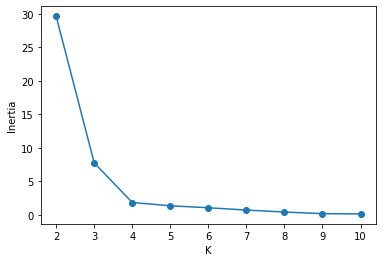

In [ ]:
from sklearn.cluster import KMeans

X = pd.DataFrame({'HPPN_X': y1_pred, 'HPPN_Y': y2_pred})

inertia = [0, ]
for i in range(2, 11):
  model = KMeans(n_clusters = i, random_state = 0)
  model.fit(X)
  inertia.append(model.inertia_)

  print('K: {}\tInertia: {}'.format(i, model.inertia_), end = '\t')

  if i > 2:
    print('Difference: {}'.format(inertia[i-2] - inertia[i-1]))
  else:
    print()

plt.plot(range(2, 11), inertia[1:], marker = 'o')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.xticks(range(2, 11))
plt.show()

In [ ]:
model = KMeans(n_clusters = 4, random_state = 0)
model.fit(X)

KMeans(n_clusters=4, random_state=0)

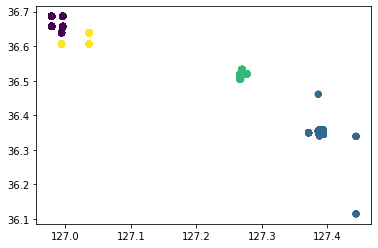

In [ ]:
plt.scatter(X['HPPN_X'], X['HPPN_Y'], c=model.labels_, cmap='viridis');

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ModelCheckpoint

X = train_215.drop(["HPPN_X", "HPPN_Y"], axis=1)
y1 = train_215["HPPN_X"]
y2 = train_215["HPPN_Y"]

X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state=0)
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.2, random_state=0)

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1))

model.compile(loss="mean_squared_error", optimizer="adam")

early_stopping = EarlyStopping(patience=5)
checkpoint = ModelCheckpoint(filepath='best_weights_X.h5', save_best_only=True, save_weights_only=True, monitor='val_loss', mode='min', verbose=1)
history = model.fit(X_train, y1_train, epochs=50, batch_size=16, validation_split=0.2, callbacks = [early_stopping, checkpoint])

print("HPPN_X")
model.load_weights('best_weights_X.h5')
score = model.evaluate(X_test, y1_test)
print("Test loss:", score)

Epoch 1/50
1819/1829 [============================>.] - ETA: 0s - loss: 3186.7114
Epoch 1: val_loss improved from inf to 3531.77295, saving model to best_weights_X.h5
1829/1829 [==============================] - 10s 4ms/step - loss: 3184.2017 - val_loss: 3531.7729
Epoch 2/50
1818/1829 [============================>.] - ETA: 0s - loss: 2342.8892
Epoch 2: val_loss improved from 3531.77295 to 2583.52881, saving model to best_weights_X.h5
1829/1829 [==============================] - 10s 5ms/step - loss: 2343.0166 - val_loss: 2583.5288
Epoch 3/50
1819/1829 [============================>.] - ETA: 0s - loss: 2108.9983
Epoch 3: val_loss did not improve from 2583.52881
1829/1829 [==============================] - 5s 3ms/step - loss: 2109.4033 - val_loss: 2601.9004
Epoch 4/50
1828/1829 [============================>.] - ETA: 0s - loss: 1883.7052
Epoch 4: val_loss improved from 2583.52881 to 1683.99927, saving model to best_weights_X.h5
1829/1829 [==============================] - 5s 3ms/step - l

In [ ]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1))

model.compile(loss="mean_squared_error", optimizer="adam")

early_stopping = EarlyStopping(patience=5)
checkpoint = ModelCheckpoint(filepath='best_weights_Y.h5', save_best_only=True, save_weights_only=True, monitor='val_loss', mode='min', verbose=1)
history = model.fit(X_train, y2_train, epochs=50, batch_size=16, validation_split=0.2, callbacks = [early_stopping, checkpoint])

print("HPPN_Y")
model.load_weights('best_weights_Y.h5')
score = model.evaluate(X_test, y2_test)
print("Test loss:", score)

Epoch 1/50
1829/1829 [==============================] - ETA: 0s - loss: 110.5704
Epoch 1: val_loss improved from inf to 183.80081, saving model to best_weights_Y.h5
1829/1829 [==============================] - 7s 3ms/step - loss: 110.5704 - val_loss: 183.8008
Epoch 2/50
1817/1829 [============================>.] - ETA: 0s - loss: 62.7291
Epoch 2: val_loss improved from 183.80081 to 150.11365, saving model to best_weights_Y.h5
1829/1829 [==============================] - 4s 2ms/step - loss: 62.6865 - val_loss: 150.1136
Epoch 3/50
1808/1829 [============================>.] - ETA: 0s - loss: 55.5272
Epoch 3: val_loss improved from 150.11365 to 67.19962, saving model to best_weights_Y.h5
1829/1829 [==============================] - 4s 2ms/step - loss: 55.4757 - val_loss: 67.1996
Epoch 4/50
1829/1829 [==============================] - ETA: 0s - loss: 47.8926
Epoch 4: val_loss did not improve from 67.19962
1829/1829 [==============================] - 6s 3ms/step - loss: 47.8926 - val_loss: 7

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV

# HPPN_X, HPPN_Y 예측

X = train_215.drop(["HPPN_X", "HPPN_Y"], axis=1)
y1 = train_215["HPPN_X"]
y2 = train_215["HPPN_Y"]

X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state=0)
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.2, random_state=0)

param_grid = {
    'learning_rate': [0.1, 0.05, 0.01],
    'n_estimators': [10, 30, 50],
    'max_depth': [2],
    'min_samples_split': [10],
    'min_samples_leaf': [1, 2, 4]
}

regressor = GradientBoostingRegressor()
grid_search = GridSearchCV(regressor, param_grid, scoring='neg_mean_squared_error', cv=5, verbose=2)
grid_search.fit(X_train, y1_train)

best_params1 = grid_search.best_params_
best_score1 = grid_search.best_score_

best_model1 = GradientBoostingRegressor(**best_params1)
best_model1.fit(X_train, y1_train)

y1_pred = best_model1.predict(X_test)

MSE1 = mean_squared_error(y1_test, y1_pred)

param_grid = {
    'learning_rate': [0.1, 0.05, 0.01],
    'n_estimators': [10, 30, 50],
    'max_depth': [3],
    'min_samples_split': [2],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(regressor, param_grid, scoring='neg_mean_squared_error', cv=5, verbose=2)
grid_search.fit(X_train, y2_train)

best_params2 = grid_search.best_params_
best_score2 = grid_search.best_score_

best_model2 = GradientBoostingRegressor(**best_params2)
best_model2.fit(X_train, y2_train)

y2_pred = best_model2.predict(X_test)

MSE2 = mean_squared_error(y2_test, y2_pred)

print()

print("HPPN_X")
print("Best hyperparameters:", best_params1)
print("Best mean squared error:", -best_score1)
print("MSE of the trained regressor:", MSE1)
print()

print("HPPN_Y")
print("Best hyperparameters:", best_params2)
print("Best mean squared error:", -best_score2)
print("MSE of the trained regressor:", MSE2)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END learning_rate=0.1, max_depth=2, min_samples_leaf=1, min_samples_split=10, n_estimators=10; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=2, min_samples_leaf=1, min_samples_split=10, n_estimators=10; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=2, min_samples_leaf=1, min_samples_split=10, n_estimators=10; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=2, min_samples_leaf=1, min_samples_split=10, n_estimators=10; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=2, min_samples_leaf=1, min_samples_split=10, n_estimators=10; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=2, min_samples_leaf=1, min_samples_split=10, n_estimators=30; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=2, min_samples_leaf=1, min_samples_split=10, n_estimators=30; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=2, min_samples_leaf=1, min_samples_split=10, n_estimators=30; total

K: 2	Inertia: 27.9342478363519	
K: 3	Inertia: 4.831203444931559	Difference: 23.10304439142034
K: 4	Inertia: 0.8121732076528425	Difference: 4.0190302372787166
K: 5	Inertia: 0.6191188091959205	Difference: 0.19305439845692196
K: 6	Inertia: 0.44287697229789275	Difference: 0.1762418368980278
K: 7	Inertia: 0.4005325351804995	Difference: 0.04234443711739322
K: 8	Inertia: 0.36557731299141083	Difference: 0.0349552221890887
K: 9	Inertia: 0.3258445924103215	Difference: 0.03973272058108934
K: 10	Inertia: 0.29359949407766395	Difference: 0.03224509833265754


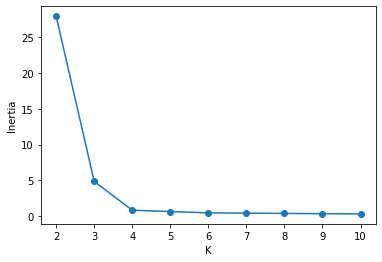

In [ ]:
from sklearn.cluster import KMeans

X = pd.DataFrame({'HPPN_X': y1_pred, 'HPPN_Y': y2_pred})

inertia = [0, ]
for i in range(2, 11):
  model = KMeans(n_clusters = i, random_state = 0)
  model.fit(X)
  inertia.append(model.inertia_)

  print('K: {}\tInertia: {}'.format(i, model.inertia_), end = '\t')

  if i > 2:
    print('Difference: {}'.format(inertia[i-2] - inertia[i-1]))
  else:
    print()

plt.plot(range(2, 11), inertia[1:], marker = 'o')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.xticks(range(2, 11))
plt.show()

In [ ]:
model = KMeans(n_clusters = 4, random_state = 0)
model.fit(X)

KMeans(n_clusters=4, random_state=0)

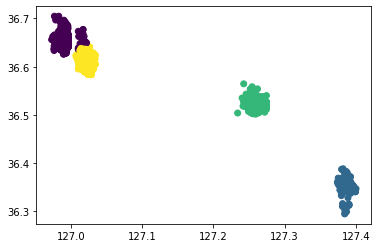

In [ ]:
plt.scatter(X['HPPN_X'], X['HPPN_Y'], c=model.labels_, cmap='viridis');

# **좌표 결측치를 평균으로 하지 않았을 때의 경우**
train_215_wmi: train_215 without mean imputation

In [ ]:
train_215_wmi.head()

,NPA_CL,EVT_STAT_CD,RPTER_SEX,HPPN_X,HPPN_Y,YEAR,MONTH,DAY,HOUR
875,13,10,2,127.385139,36.321829,21,1,1,13
4685,13,10,2,127.404663,36.341685,21,1,3,18
5691,13,10,2,127.404663,36.341685,21,1,7,7
6046,13,10,3,127.394722,36.438611,21,1,4,11
6119,13,10,3,127.356967,36.332099,21,1,7,8


In [ ]:
train_215_wmi['YEAR'] += 2000
train_215_wmi['WEEKDAY'] = pd.to_datetime(train_215_wmi[['YEAR', 'MONTH', 'DAY']]).dt.dayofweek
train_215_wmi.head()

,NPA_CL,EVT_STAT_CD,RPTER_SEX,HPPN_X,HPPN_Y,YEAR,MONTH,DAY,HOUR,WEEKDAY
875,13,10,2,127.385139,36.321829,2021,1,1,13,4
4685,13,10,2,127.404663,36.341685,2021,1,3,18,6
5691,13,10,2,127.404663,36.341685,2021,1,7,7,3
6046,13,10,3,127.394722,36.438611,2021,1,4,11,0
6119,13,10,3,127.356967,36.332099,2021,1,7,8,3


In [ ]:
print(train_215_wmi['HPPN_X'].isnull().sum(), train_215_wmi['HPPN_Y'].isnull().sum())

0 0


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV

# HPPN_X, HPPN_Y 예측

X = train_215_wmi.drop(["HPPN_X", "HPPN_Y"], axis=1)
y1 = train_215_wmi["HPPN_X"]
y2 = train_215_wmi["HPPN_Y"]

X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state=0)
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.2, random_state=0)


In [ ]:

param_grid = {
    'learning_rate': [0.03, 0.05, 0.07],
    'n_estimators': [30, 50, 100],
    'max_depth': [2, 3, 4],
    "min_samples_split": [8, 9, 10],
    'min_samples_leaf': [1, 2, 4]
}

regressor = GradientBoostingRegressor()
grid_search = GridSearchCV(regressor, param_grid, scoring='neg_mean_squared_error', cv=5, verbose=2)
grid_search.fit(X_train, y1_train)

best_params1 = grid_search.best_params_
best_score1 = grid_search.best_score_

best_model1 = GradientBoostingRegressor(**best_params1)
best_model1.fit(X_train, y1_train)

y1_pred = best_model1.predict(X_test)

MSE1 = mean_squared_error(y1_test, y1_pred)

param_grid = {
    'learning_rate': [0.03, 0.05, 0.07],
    'n_estimators': [30, 50, 100],
    'max_depth': [2, 3, 4],
    "min_samples_split": [2, 3, 4],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(regressor, param_grid, scoring='neg_mean_squared_error', cv=5, verbose=2)
grid_search.fit(X_train, y2_train)

best_params2 = grid_search.best_params_
best_score2 = grid_search.best_score_

best_model2 = GradientBoostingRegressor(**best_params2)
best_model2.fit(X_train, y2_train)

y2_pred = best_model2.predict(X_test)

MSE2 = mean_squared_error(y2_test, y2_pred)

print()

print("HPPN_X")
print("Best hyperparameters:", best_params1)
print("Best mean squared error:", -best_score1)
print("MSE of the trained regressor:", MSE1)
print()

print("HPPN_Y")
print("Best hyperparameters:", best_params2)
print("Best mean squared error:", -best_score2)
print("MSE of the trained regressor:", MSE2)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[CV] END learning_rate=0.03, max_depth=2, min_samples_leaf=1, min_samples_split=8, n_estimators=30; total time=   0.3s
[CV] END learning_rate=0.03, max_depth=2, min_samples_leaf=1, min_samples_split=8, n_estimators=30; total time=   0.3s
[CV] END learning_rate=0.03, max_depth=2, min_samples_leaf=1, min_samples_split=8, n_estimators=30; total time=   0.3s
[CV] END learning_rate=0.03, max_depth=2, min_samples_leaf=1, min_samples_split=8, n_estimators=30; total time=   0.3s
[CV] END learning_rate=0.03, max_depth=2, min_samples_leaf=1, min_samples_split=8, n_estimators=30; total time=   0.3s
[CV] END learning_rate=0.03, max_depth=2, min_samples_leaf=1, min_samples_split=8, n_estimators=50; total time=   0.5s
[CV] END learning_rate=0.03, max_depth=2, min_samples_leaf=1, min_samples_split=8, n_estimators=50; total time=   0.5s
[CV] END learning_rate=0.03, max_depth=2, min_samples_leaf=1, min_samples_split=8, n_estimators=50; tot

In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7936 entries, 563899 to 1345347
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   NPA_CL       7936 non-null   int64
 1   EVT_STAT_CD  7936 non-null   int64
 2   RPTER_SEX    7936 non-null   int64
 3   YEAR         7936 non-null   int64
 4   MONTH        7936 non-null   int64
 5   DAY          7936 non-null   int64
 6   HOUR         7936 non-null   int64
dtypes: int64(7)
memory usage: 496.0 KB


K: 2	Inertia: 25.014588594242525	
K: 3	Inertia: 3.513714006357019	Difference: 21.500874587885505
K: 4	Inertia: 1.8359694692289437	Difference: 1.6777445371280755
K: 5	Inertia: 1.4187832356780503	Difference: 0.41718623355089335
K: 6	Inertia: 1.2324235400045525	Difference: 0.18635969567349786
K: 7	Inertia: 1.0836497917492536	Difference: 0.14877374825529888
K: 8	Inertia: 0.9692770468364951	Difference: 0.1143727449127585
K: 9	Inertia: 0.8883089847639687	Difference: 0.08096806207252638
K: 10	Inertia: 0.8303542203189924	Difference: 0.05795476444497627
K: 11	Inertia: 0.774293186679496	Difference: 0.05606103363949644
K: 12	Inertia: 0.6988078745341748	Difference: 0.07548531214532117
K: 13	Inertia: 0.672818147767619	Difference: 0.025989726766555865
K: 14	Inertia: 0.6336065769424042	Difference: 0.03921157082521476
K: 15	Inertia: 0.593624222369249	Difference: 0.03998235457315513
K: 16	Inertia: 0.5669215253448289	Difference: 0.026702697024420186
K: 17	Inertia: 0.5331397661800079	Difference: 0.033781

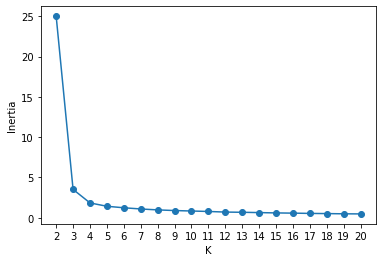

In [ ]:
from sklearn.cluster import KMeans

X = pd.DataFrame({'HPPN_X': y1_pred, 'HPPN_Y': y2_pred})

inertia = [0, ]
for i in range(2, 21):
  model = KMeans(n_clusters = i, random_state = 0)
  model.fit(X)
  inertia.append(model.inertia_)

  print('K: {}\tInertia: {}'.format(i, model.inertia_), end = '\t')

  if i > 2:
    print('Difference: {}'.format(inertia[i-2] - inertia[i-1]))
  else:
    print()

plt.plot(range(2, 21), inertia[1:], marker = 'o')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.xticks(range(2, 21))
plt.show()

In [ ]:
model = KMeans(n_clusters = 5, random_state = 0)
model.fit(X)

KMeans(n_clusters=5, random_state=0)

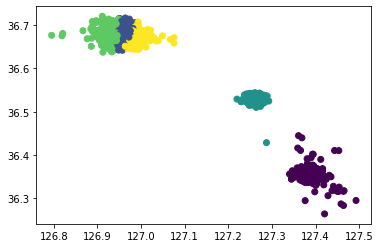

In [ ]:
plt.scatter(X['HPPN_X'], X['HPPN_Y'], c=model.labels_, cmap='viridis');

위 Clustering 결과를 분석한 결과 경찰청 번호 13, 19, 31에 너무 큰 영향을 받는 것으로 추정
### 경찰청 번호를 삭제한 뒤 다시 분석 진행

In [ ]:
train_215_2 = train_215_wmi.drop(['NPA_CL'], axis=1)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, RandomizedSearchCV

# HPPN_X, HPPN_Y 예측

X = train_215_2.drop(["HPPN_X", "HPPN_Y"], axis=1)
y1 = train_215_2["HPPN_X"]
y2 = train_215_2["HPPN_Y"]

X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state=0)
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.2, random_state=0)

param_dist = {
    'learning_rate': [0.01 * i for i in range(1, 11)],
    'n_estimators': [10 * i for i in range(1, 11)],
    'max_depth': [i for i in range(2, 6)],
    "min_samples_split": [i for i in range(2, 11)],
    'min_samples_leaf': [i for i in range(1, 5)]
}

regressor = GradientBoostingRegressor()
rs = RandomizedSearchCV(regressor, param_distributions=param_dist, n_iter=20, scoring='neg_mean_squared_error', cv=5, verbose=2)
rs.fit(X_train, y1_train)

best_params1 = rs.best_params_
best_score1 = rs.best_score_

best_model1 = GradientBoostingRegressor(**best_params1)
best_model1.fit(X_train, y1_train)

y1_pred = best_model1.predict(X_test)

MSE1 = mean_squared_error(y1_test, y1_pred)

rs = RandomizedSearchCV(regressor, param_distributions=param_dist, n_iter=20, scoring='neg_mean_squared_error', cv=5, verbose=2)
rs.fit(X_train, y2_train)

best_params2 = rs.best_params_
best_score2 = rs.best_score_

best_model2 = GradientBoostingRegressor(**best_params2)
best_model2.fit(X_train, y2_train)

y2_pred = best_model2.predict(X_test)

MSE2 = mean_squared_error(y2_test, y2_pred)

print()

print("HPPN_X")
print("Best hyperparameters:", best_params1)
print("Best mean squared error:", -best_score1)
print("MSE of the trained regressor:", MSE1)
print()

print("HPPN_Y")
print("Best hyperparameters:", best_params2)
print("Best mean squared error:", -best_score2)
print("MSE of the trained regressor:", MSE2)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END learning_rate=0.07, max_depth=3, min_samples_leaf=3, min_samples_split=10, n_estimators=50; total time=   0.8s
[CV] END learning_rate=0.07, max_depth=3, min_samples_leaf=3, min_samples_split=10, n_estimators=50; total time=   0.9s
[CV] END learning_rate=0.07, max_depth=3, min_samples_leaf=3, min_samples_split=10, n_estimators=50; total time=   0.8s
[CV] END learning_rate=0.07, max_depth=3, min_samples_leaf=3, min_samples_split=10, n_estimators=50; total time=   0.8s
[CV] END learning_rate=0.07, max_depth=3, min_samples_leaf=3, min_samples_split=10, n_estimators=50; total time=   0.6s
[CV] END learning_rate=0.06, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   1.1s
[CV] END learning_rate=0.06, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   1.2s
[CV] END learning_rate=0.06, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, RandomizedSearchCV

# HPPN_X, HPPN_Y 예측

X = train_215_2.drop(["HPPN_X", "HPPN_Y"], axis=1)
y1 = train_215_2["HPPN_X"]
y2 = train_215_2["HPPN_Y"]

X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state=0)
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.2, random_state=0)

param_dist = {
    'learning_rate': [0.001 * i for i in range(30, 61)],
    'n_estimators': [i for i in range(50, 91)],
    'max_depth': [i for i in range(4, 7)],
    "min_samples_split": [i for i in range(8, 12)],
    'min_samples_leaf': [i for i in range(3, 6)]
}

regressor = GradientBoostingRegressor()
rs = RandomizedSearchCV(regressor, param_distributions=param_dist, n_iter=10, scoring='neg_mean_squared_error', cv=5, verbose=2)
rs.fit(X_train, y1_train)

best_params1 = rs.best_params_
best_score1 = rs.best_score_

best_model1 = GradientBoostingRegressor(**best_params1)
best_model1.fit(X_train, y1_train)

y1_pred = best_model1.predict(X_test)

MSE1 = mean_squared_error(y1_test, y1_pred)

rs = RandomizedSearchCV(regressor, param_distributions=param_dist, n_iter=10, scoring='neg_mean_squared_error', cv=5, verbose=2)
rs.fit(X_train, y2_train)

best_params2 = rs.best_params_
best_score2 = rs.best_score_

best_model2 = GradientBoostingRegressor(**best_params2)
best_model2.fit(X_train, y2_train)

y2_pred = best_model2.predict(X_test)

MSE2 = mean_squared_error(y2_test, y2_pred)

print()

print("HPPN_X")
print("Best hyperparameters:", best_params1)
print("Best mean squared error:", -best_score1)
print("MSE of the trained regressor:", MSE1)
print()

print("HPPN_Y")
print("Best hyperparameters:", best_params2)
print("Best mean squared error:", -best_score2)
print("MSE of the trained regressor:", MSE2)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END learning_rate=0.057, max_depth=5, min_samples_leaf=3, min_samples_split=8, n_estimators=90; total time=   1.7s
[CV] END learning_rate=0.057, max_depth=5, min_samples_leaf=3, min_samples_split=8, n_estimators=90; total time=   2.2s
[CV] END learning_rate=0.057, max_depth=5, min_samples_leaf=3, min_samples_split=8, n_estimators=90; total time=   2.2s
[CV] END learning_rate=0.057, max_depth=5, min_samples_leaf=3, min_samples_split=8, n_estimators=90; total time=   1.6s
[CV] END learning_rate=0.057, max_depth=5, min_samples_leaf=3, min_samples_split=8, n_estimators=90; total time=   1.6s
[CV] END learning_rate=0.045, max_depth=6, min_samples_leaf=5, min_samples_split=9, n_estimators=62; total time=   1.3s
[CV] END learning_rate=0.045, max_depth=6, min_samples_leaf=5, min_samples_split=9, n_estimators=62; total time=   1.3s
[CV] END learning_rate=0.045, max_depth=6, min_samples_leaf=5, min_samples_split=9, n_estimators=62

K: 2	Inertia: 9.212234662502295	
K: 3	Inertia: 6.268828339214106	Difference: 2.9434063232881895
K: 4	Inertia: 4.806551587193055	Difference: 1.462276752021051
K: 5	Inertia: 4.078963164512812	Difference: 0.7275884226802427
K: 6	Inertia: 3.6296995890360257	Difference: 0.4492635754767864
K: 7	Inertia: 3.2209987769700046	Difference: 0.40870081206602116
K: 8	Inertia: 2.8995623869757416	Difference: 0.32143638999426294
K: 9	Inertia: 2.653054395010237	Difference: 0.24650799196550466
K: 10	Inertia: 2.408738785740046	Difference: 0.24431560927019103
K: 11	Inertia: 2.209863011414675	Difference: 0.19887577432537107
K: 12	Inertia: 2.0456343915276607	Difference: 0.1642286198870142
K: 13	Inertia: 1.902162519252681	Difference: 0.1434718722749797
K: 14	Inertia: 1.7929953519916977	Difference: 0.1091671672609833
K: 15	Inertia: 1.6685043780075555	Difference: 0.12449097398414222
K: 16	Inertia: 1.5731420778630993	Difference: 0.09536230014445612
K: 17	Inertia: 1.4851635295964631	Difference: 0.0879785482666362


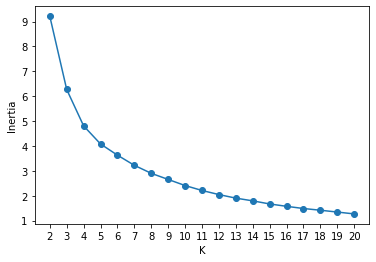

In [ ]:
from sklearn.cluster import KMeans

X = pd.DataFrame({'HPPN_X': y1_pred, 'HPPN_Y': y2_pred})

inertia = [0, ]
for i in range(2, 21):
  model = KMeans(n_clusters = i, random_state = 0)
  model.fit(X)
  inertia.append(model.inertia_)

  print('K: {}\tInertia: {}'.format(i, model.inertia_), end = '\t')

  if i > 2:
    print('Difference: {}'.format(inertia[i-2] - inertia[i-1]))
  else:
    print()

plt.plot(range(2, 21), inertia[1:], marker = 'o')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.xticks(range(2, 21))
plt.show()

In [ ]:
model = KMeans(n_clusters = 6, random_state = 0)
model.fit(X)

KMeans(n_clusters=6, random_state=0)

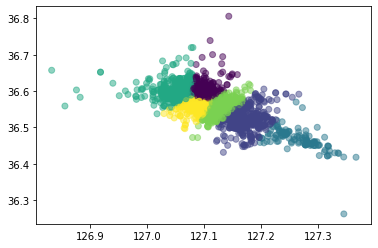

In [ ]:
plt.scatter(X['HPPN_X'], X['HPPN_Y'], c=model.labels_, cmap='viridis', alpha=0.5);

In [ ]:
# 추정치를 지도에 시각화한 결과

import folium
from folium.plugins import MarkerCluster


m = folium.Map(
    location=[36.55, 127.05],
    zoom_start=11
)


marker_cluster = MarkerCluster().add_to(m)

for i in range(len(X)):
  folium.Marker(
    location=(X['HPPN_Y'].iloc[i], X['HPPN_X'].iloc[i]),
    icon=folium.Icon(color='red',icon='ok'),
  ).add_to(marker_cluster)

m

In [ ]:
# 원본 데이터셋을 지도에 시각화한 결과
import folium
from folium.plugins import MarkerCluster

m = folium.Map(
    location=[36.55, 127.05],
    zoom_start=11
)


marker_cluster = MarkerCluster().add_to(m)

for i in range(len(train_215_wmi)):
  folium.Marker(
    location=(train_215_wmi['HPPN_Y'].iloc[i], train_215_wmi['HPPN_X'].iloc[i]),
    icon=folium.Icon(color='red',icon='ok'),
  ).add_to(marker_cluster)

m

# **위도, 경도 Normalize**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler

import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# HPPN_X, HPPN_Y 예측

scaler1 = MinMaxScaler()
scaler2 = MinMaxScaler()

X = train_215_2.drop(["HPPN_X", "HPPN_Y"], axis=1)
y1 = train_215_2["HPPN_X"]
y2 = train_215_2["HPPN_Y"]

y1 = scaler1.fit_transform((y1.to_numpy()).reshape(-1, 1))
y2 = scaler2.fit_transform((y2.to_numpy()).reshape(-1, 1))

X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state=0)
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.2, random_state=0)

param_dist = {
    'learning_rate': [0.01 * i for i in range(1, 11)],
    'n_estimators': [10 * i for i in range(1, 11)],
    'max_depth': [i for i in range(2, 6)],
    "min_samples_split": [i for i in range(2, 11)],
    'min_samples_leaf': [i for i in range(1, 5)]
}

regressor = GradientBoostingRegressor()
rs = RandomizedSearchCV(regressor, param_distributions=param_dist, n_iter=20, scoring='neg_mean_squared_error', cv=5, verbose=2)
rs.fit(X_train, y1_train)

best_params1 = rs.best_params_
best_score1 = rs.best_score_

best_model1 = GradientBoostingRegressor(**best_params1)
best_model1.fit(X_train, y1_train)

y1_pred = best_model1.predict(X_test)

MSE1 = mean_squared_error(y1_test, y1_pred)

rs = RandomizedSearchCV(regressor, param_distributions=param_dist, n_iter=20, scoring='neg_mean_squared_error', cv=5, verbose=2)
rs.fit(X_train, y2_train)

best_params2 = rs.best_params_
best_score2 = rs.best_score_

best_model2 = GradientBoostingRegressor(**best_params2)
best_model2.fit(X_train, y2_train)

y2_pred = best_model2.predict(X_test)

MSE2 = mean_squared_error(y2_test, y2_pred)

print()

print("HPPN_X")
print("Best hyperparameters:", best_params1)
print("Best mean squared error:", -best_score1)
print("MSE of the trained regressor:", MSE1)
print()

print("HPPN_Y")
print("Best hyperparameters:", best_params2)
print("Best mean squared error:", -best_score2)
print("MSE of the trained regressor:", MSE2)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END learning_rate=0.05, max_depth=5, min_samples_leaf=4, min_samples_split=4, n_estimators=30; total time=   1.0s
[CV] END learning_rate=0.05, max_depth=5, min_samples_leaf=4, min_samples_split=4, n_estimators=30; total time=   0.8s
[CV] END learning_rate=0.05, max_depth=5, min_samples_leaf=4, min_samples_split=4, n_estimators=30; total time=   0.7s
[CV] END learning_rate=0.05, max_depth=5, min_samples_leaf=4, min_samples_split=4, n_estimators=30; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=5, min_samples_leaf=4, min_samples_split=4, n_estimators=30; total time=   0.6s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   1.3s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   1.7s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total ti

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler

import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# HPPN_X, HPPN_Y 예측

scaler1 = MinMaxScaler()
scaler2 = MinMaxScaler()

X = train_215_2.drop(["HPPN_X", "HPPN_Y"], axis=1)
y1 = train_215_2["HPPN_X"]
y2 = train_215_2["HPPN_Y"]

y1 = scaler1.fit_transform((y1.to_numpy()).reshape(-1, 1))
y2 = scaler2.fit_transform((y2.to_numpy()).reshape(-1, 1))

X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state=0)
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.2, random_state=0)

param_dist = {
    'learning_rate': [0.001 * i for i in range(20, 81)],
    'n_estimators': [i for i in range(50, 81)],
    'max_depth': [i for i in range(4, 7)],
    "min_samples_split": [i for i in range(2, 7)],
    'min_samples_leaf': [i for i in range(1, 5)]
}

regressor = GradientBoostingRegressor()
rs = RandomizedSearchCV(regressor, param_distributions=param_dist, n_iter=10, scoring='neg_mean_squared_error', cv=5, verbose=2)
rs.fit(X_train, y1_train)

best_params1 = rs.best_params_
best_score1 = rs.best_score_

best_model1 = GradientBoostingRegressor(**best_params1)
best_model1.fit(X_train, y1_train)

y1_pred = best_model1.predict(X_test)

MSE1 = mean_squared_error(y1_test, y1_pred)

rs = RandomizedSearchCV(regressor, param_distributions=param_dist, n_iter=10, scoring='neg_mean_squared_error', cv=5, verbose=2)
rs.fit(X_train, y2_train)

best_params2 = rs.best_params_
best_score2 = rs.best_score_

best_model2 = GradientBoostingRegressor(**best_params2)
best_model2.fit(X_train, y2_train)

y2_pred = best_model2.predict(X_test)

MSE2 = mean_squared_error(y2_test, y2_pred)

print()

print("HPPN_X")
print("Best hyperparameters:", best_params1)
print("Best mean squared error:", -best_score1)
print("MSE of the trained regressor:", MSE1)
print()

print("HPPN_Y")
print("Best hyperparameters:", best_params2)
print("Best mean squared error:", -best_score2)
print("MSE of the trained regressor:", MSE2)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END learning_rate=0.047, max_depth=6, min_samples_leaf=1, min_samples_split=6, n_estimators=69; total time=   2.1s
[CV] END learning_rate=0.047, max_depth=6, min_samples_leaf=1, min_samples_split=6, n_estimators=69; total time=   1.9s
[CV] END learning_rate=0.047, max_depth=6, min_samples_leaf=1, min_samples_split=6, n_estimators=69; total time=   1.5s
[CV] END learning_rate=0.047, max_depth=6, min_samples_leaf=1, min_samples_split=6, n_estimators=69; total time=   1.4s
[CV] END learning_rate=0.047, max_depth=6, min_samples_leaf=1, min_samples_split=6, n_estimators=69; total time=   1.5s
[CV] END learning_rate=0.05, max_depth=6, min_samples_leaf=1, min_samples_split=3, n_estimators=70; total time=   1.5s
[CV] END learning_rate=0.05, max_depth=6, min_samples_leaf=1, min_samples_split=3, n_estimators=70; total time=   1.5s
[CV] END learning_rate=0.05, max_depth=6, min_samples_leaf=1, min_samples_split=3, n_estimators=70; t

In [ ]:
aX = scaler1.inverse_transform(y1_pred.reshape(-1, 1)).ravel()
aY = scaler2.inverse_transform(y2_pred.reshape(-1, 1)).ravel()
print(aX, aX.shape)
print(aY, aY.shape)

[127.07335456 127.13770556 127.12925899 ... 127.11233272 127.06693353
 127.07314114] (7936,)
[36.59584902 36.53453175 36.55967973 ... 36.58674553 36.5857069
 36.56577871] (7936,)


In [ ]:
X = pd.DataFrame({'HPPN_X': aX, 'HPPN_Y': aY})
X.head()

,HPPN_X,HPPN_Y
0,127.073355,36.595849
1,127.137706,36.534532
2,127.129259,36.559680
3,127.079666,36.589507
4,127.095852,36.582550


K: 2	Inertia: 6.679397382007465	
K: 3	Inertia: 4.179920115187028	Difference: 2.4994772668204366
K: 4	Inertia: 3.008828294552682	Difference: 1.171091820634346
K: 5	Inertia: 2.4457503575060127	Difference: 0.5630779370466694
K: 6	Inertia: 2.0745683656478837	Difference: 0.37118199185812895
K: 7	Inertia: 1.7821047321328423	Difference: 0.29246363351504145
K: 8	Inertia: 1.6499506241349422	Difference: 0.13215410799790006
K: 9	Inertia: 1.5224090125595913	Difference: 0.12754161157535093
K: 10	Inertia: 1.3990302226861315	Difference: 0.12337878987345974
K: 11	Inertia: 1.2805624605733321	Difference: 0.11846776211279941
K: 12	Inertia: 1.1963772911154777	Difference: 0.08418516945785437
K: 13	Inertia: 1.0975343345089332	Difference: 0.09884295660654452
K: 14	Inertia: 1.013460705696134	Difference: 0.08407362881279923
K: 15	Inertia: 0.9437077133994536	Difference: 0.06975299229668042
K: 16	Inertia: 0.8947886276160975	Difference: 0.04891908578335613
K: 17	Inertia: 0.8378987787927731	Difference: 0.056889848

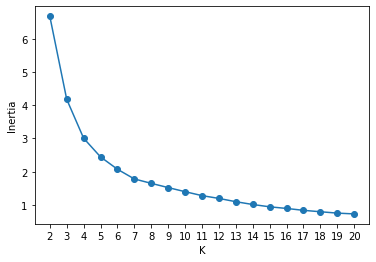

In [ ]:
from sklearn.cluster import KMeans

inertia = [0, ]
for i in range(2, 21):
  model = KMeans(n_clusters = i, random_state = 0)
  model.fit(X)
  inertia.append(model.inertia_)

  print('K: {}\tInertia: {}'.format(i, model.inertia_), end = '\t')

  if i > 2:
    print('Difference: {}'.format(inertia[i-2] - inertia[i-1]))
  else:
    print()

plt.plot(range(2, 21), inertia[1:], marker = 'o')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.xticks(range(2, 21))
plt.show()

In [ ]:
model = KMeans(n_clusters = 6, random_state = 0)
model.fit(X)

KMeans(n_clusters=6, random_state=0)

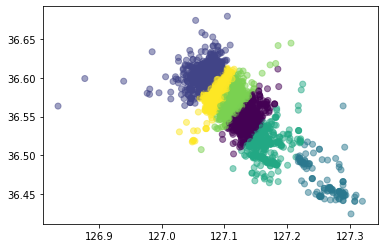

In [ ]:
plt.scatter((X['HPPN_X']), X['HPPN_Y'], c=model.labels_, cmap='viridis', alpha=0.5);

In [ ]:
# 추정치를 지도에 시각화한 결과

import folium
from folium.plugins import MarkerCluster


m = folium.Map(
    location=[36.55, 127.05],
    zoom_start=11
)


marker_cluster = MarkerCluster().add_to(m)

for i in range(len(X)):
  folium.Marker(
    location=(X['HPPN_Y'].iloc[i], X['HPPN_X'].iloc[i]),
    icon=folium.Icon(color='red',icon='ok'),
  ).add_to(marker_cluster)

m